In [1]:
#importing dependencies
import forestplot as fp
import pandas as pd
import numpy as np
import meta
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import norm, stats


In [2]:
#loading data sets
acceptance = pd.read_excel("Vaccine acceptance rate-1.xlsx",skiprows=1)
hesitancy = pd.read_excel("Vaccine hesitancy rate-1.xlsx",skiprows=1)
intention = pd.read_excel("Vaccine intention rate-1.xlsx")

display(acceptance)
display(hesitancy)
display(intention)

,S No.,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Acceptance rate rate,Unnamed: 9,Unnamed: 10
0,1.0,Agha et al. (2021),Nation wide,2021-07-01 00:00:00,Online,Healthcare workers,496.0,163.7,0.33,28.92 - 37.20,NaN
1,2.0,Abubakar et al. (2022),Katsina,1st to 22nd May 2021,Online,Health care workers,793.0,713.7,90% had 1st dose,87.95 - 92.12,NaN
2,3.0,Ilori et al. (2021),Nationwide,23rd Mar to 3rd May 2021,Online,Health care workers,309.0,117.1,0.379,32.46 - 43.27,NaN
3,4.0,Oriji et al. (2021),Bayelsa,1st to 23rd Apr 2021,Hospital,Health Workers (other than Doctors),182.0,49.9,0.274,20.99 - 33.96,NaN
4,5.0,Obi et al. (2021),Edo,1st Feb to 31st May 2021,Community,Security personnel,482.0,242.0,0.502,45.74 - 54.67,NaN
5,NaN,Pooled,NaN,NaN,NaN,NaN,1780.0,1286.4,58.67,56.36 - 60.94,1044.4
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7227,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1469.0,572.7,0.39,36.51 - 41.50,NaN


,S No,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Hesitancy rate rate,Unnamed: 9
0,1.0,Adigwe (2021),FCT,2021-01-01 00:00:00,Online and physical survey,General population,1767,1297.0,0.7340,71.34 - 75.46
1,2.0,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,131.2,0.3400,29.21 - 38.66
2,3.0,Nri-Ezedi (2021),34 states,2021-01-01 00:00:00,Online,Doctors,831,220.2,0.2650,24.01 - 30.11
3,4.0,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,754.0,0.7540,72.73 - 78.07
4,5.0,Amuzie et al. (2021),Abia,2021-03-01 00:00:00,Online,Healthcare workers,422,213.1,0.5050,45.70 - 55.24
5,6.0,Adebisi et al. (2021),Nationwide,2020-08-01 00:00:00,Online,General population 15 years and above,517,131.8,0.2550,21.77 - 29.29
6,7.0,Obafemi et al. (2021),FCT,Not available,Community,General population,1200,219.6,0.1830,16.06 - 20.44
7,8.0,Robinson et al. (2021),Nationwide,Dec 20 - Jan 21,Online,Healthcare workers,1094,434.1,0.3968,36.77 - 42.57
8,9.0,Uzochukwu et al. (2021),Anambra,Jan - Feb 2021,Online,University Staff and students 16-80 years,349,227.0,0.6504,60.04 - 70.05
9,10.0,Iwu et al (2022),Imo,28 Sept to 14 Oct 2021,Online,Health care workers,347,122.8,0.3540,30.41 - 40.48


,Unnamed: 0,Study,States(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine intention rate,95% Confidence interval,Standard Error
0,1,Adigwe (2021),FCT,2021-01-01 00:00:00,Online and physical survey,General population,1767,401.0,0.2270,20.74 - 24.65%,0.0100
1,2,Okafor et al. (2021),Nationwide,Not available,Online,General population,689,298.0,0.4330,39.55 - 46.95%,0.0189
2,3,Chinawa et al. (2021),Ebonyi and Enigu,Not available,Hospital,Mothers,577,39.8,0.0690,4.86 - 9.00%,0.0106
3,4,Dozie et al. (2021),Imo,Not available,Community,General population,436,113.4,0.2600,21.8 - 30.03%,0.0210
4,5,Udejinta (2021),Oyo,Not available,School,Employees of tertiary institutions,325,47.1,0.1450,10.64 - 18.29%,0.0195
5,6,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,254.8,0.6600,61.07 - 70.54%,0.0241
6,7,Nri-Ezedi (2021),34 states,2021-01-01 00:00:00,Online,Doctors,831,322.4,0.3880,35.44 - 42.06%,0.0169
7,8,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,246.0,0.2460,21.93 - 27.27%,0.0136
8,9,Adebisi et al. (2021),Nationwide,2020-08-01 00:00:00,Online,General population 15 years and above,517,385.1,0.7450,70.71 - 78.23%,0.0192
9,10,Obafemi et al. (2021),FCT,Not available,Community,General population,1200,975.6,0.8130,79.13 - 83.54%,0.0112


Some columns in each table are incorrectly named.
Correcting the values with those from the other tables

In [3]:
acceptance.rename(columns={'Unnamed: 7': 'Number intended', 'States(s)':'State(s)','Unnamed: 9':'95% Confidence interval','Acceptance rate rate':'Acceptance rate (%)'}, inplace=True)
acceptance.drop('Unnamed: 10', axis=1, inplace=True)

hesitancy.rename(columns={'S No':'S No.', 'States(s)':'State(s)', 'Unnamed: 7': 'Number intended','Unnamed: 9':'95% Confidence interval','Hesitancy rate rate':'Hesitancy rate (%)'}, inplace=True)

intention.rename(columns={'Unnamed: 0': 'S No.', 'States(s)':'State(s)', 'Vaccine intention rate':'Vaccine intention rate (%)'},inplace=True)

The last three values of acceptance data are missing quite a lot of values.
Instead of dropping them, let's replace the missing columns with random samples from other rows.

In [4]:
#fill the missing serial numbers and convert them to integers for acceptance data
acceptance['S No.'].fillna(0.0,inplace=True)
acceptance['S No.']=acceptance['S No.'].astype(int)
start = 6
step = 1
mask = acceptance['S No.'] == 0
replacement_sequence = range(start, start+sum(mask), step)
acceptance.loc[mask, 'S No.'] = replacement_sequence

#replacing other missing column values in acceptance rate data
random_seed = 2
np.random.seed(random_seed)
column_names = ['Study','State(s)','Date of survey','Setting','Target population','Sample size','Number intended','Acceptance rate (%)']
for col in column_names:
    column_to_process = acceptance[col]
    non_null_values = column_to_process.dropna()
    nan_indices = column_to_process.index[column_to_process.isna()]
    replacement_values = {index: np.random.choice(non_null_values) for index in nan_indices}
    column_to_process.fillna(replacement_values, inplace=True)
    acceptance[col] = column_to_process
    
#replacing missing column values in hesitancy rate data
hesitancy['S No.'].fillna(21.0,inplace=True)
hesitancy['S No.']=hesitancy['S No.'].astype(int)

random_seed = 1
np.random.seed(random_seed)
column_names = ['Study','State(s)','Date of survey','Setting','Target population','Sample size','Number intended','Hesitancy rate (%)','95% Confidence interval']
for col in column_names:
    column_to_process = hesitancy[col]
    non_null_values = column_to_process.dropna()
    nan_indices = column_to_process.index[column_to_process.isna()]
    replacement_values = {index: np.random.choice(non_null_values) for index in nan_indices}
    column_to_process.fillna(replacement_values, inplace=True)
    hesitancy[col] = column_to_process

#correcting specific values in each column
acceptance['Acceptance rate (%)'] = [0.9 if x == '90% had 1st dose' else x for x in acceptance['Acceptance rate (%)']]
acceptance['Acceptance rate (%)'] = [0.5867 if x == 58.67 else x for x in acceptance['Acceptance rate (%)']]
acceptance['Acceptance rate (%)'] = acceptance['Acceptance rate (%)'].astype(float)
hesitancy['Hesitancy rate (%)'] = [0.4563 if x == 45.63 else x for x in hesitancy['Hesitancy rate (%)']]

intention['95% Confidence interval'] = intention['95% Confidence interval'].str.strip('%')
display(acceptance)
display(hesitancy)
display(intention)
# acceptance['Acceptance rate (%)'] = acceptance['Acceptance rate (%)']
# hesitancy['Hesitancy rate (%)'] = hesitancy['Hesitancy rate (%)']
# intention['Vaccine intention rate (%)'] = intention['Vaccine intention rate (%)']

,S No.,Study,State(s),Date of survey,Setting,Target population,Sample size,Number intended,Acceptance rate (%),95% Confidence interval
0,1,Agha et al. (2021),Nation wide,2021-07-01 00:00:00,Online,Healthcare workers,496.0,163.7,0.3300,28.92 - 37.20
1,2,Abubakar et al. (2022),Katsina,1st to 22nd May 2021,Online,Health care workers,793.0,713.7,0.9000,87.95 - 92.12
2,3,Ilori et al. (2021),Nationwide,23rd Mar to 3rd May 2021,Online,Health care workers,309.0,117.1,0.3790,32.46 - 43.27
3,4,Oriji et al. (2021),Bayelsa,1st to 23rd Apr 2021,Hospital,Health Workers (other than Doctors),182.0,49.9,0.2740,20.99 - 33.96
4,5,Obi et al. (2021),Edo,1st Feb to 31st May 2021,Community,Security personnel,482.0,242.0,0.5020,45.74 - 54.67
5,6,Pooled,Nation wide,1st to 23rd Apr 2021,Online,Security personnel,1780.0,1286.4,0.5867,56.36 - 60.94
6,7,Agha et al. (2021),Bayelsa,2021-07-01 00:00:00,Hospital,Security personnel,1780.0,49.9,0.7227,NaN
7,8,Pooled,Nationwide,23rd Mar to 3rd May 2021,Online,Security personnel,1469.0,572.7,0.3900,36.51 - 41.50


,S No.,Study,State(s),Date of survey,Setting,Target population,Sample size,Number intended,Hesitancy rate (%),95% Confidence interval
0,1,Adigwe (2021),FCT,2021-01-01 00:00:00,Online and physical survey,General population,1767,1297.0,0.7340,71.34 - 75.46
1,2,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,131.2,0.3400,29.21 - 38.66
2,3,Nri-Ezedi (2021),34 states,2021-01-01 00:00:00,Online,Doctors,831,220.2,0.2650,24.01 - 30.11
3,4,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,754.0,0.7540,72.73 - 78.07
4,5,Amuzie et al. (2021),Abia,2021-03-01 00:00:00,Online,Healthcare workers,422,213.1,0.5050,45.70 - 55.24
5,6,Adebisi et al. (2021),Nationwide,2020-08-01 00:00:00,Online,General population 15 years and above,517,131.8,0.2550,21.77 - 29.29
6,7,Obafemi et al. (2021),FCT,Not available,Community,General population,1200,219.6,0.1830,16.06 - 20.44
7,8,Robinson et al. (2021),Nationwide,Dec 20 - Jan 21,Online,Healthcare workers,1094,434.1,0.3968,36.77 - 42.57
8,9,Uzochukwu et al. (2021),Anambra,Jan - Feb 2021,Online,University Staff and students 16-80 years,349,227.0,0.6504,60.04 - 70.05
9,10,Iwu et al (2022),Imo,28 Sept to 14 Oct 2021,Online,Health care workers,347,122.8,0.3540,30.41 - 40.48


,S No.,Study,State(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine intention rate (%),95% Confidence interval,Standard Error
0,1,Adigwe (2021),FCT,2021-01-01 00:00:00,Online and physical survey,General population,1767,401.0,0.2270,20.74 - 24.65,0.0100
1,2,Okafor et al. (2021),Nationwide,Not available,Online,General population,689,298.0,0.4330,39.55 - 46.95,0.0189
2,3,Chinawa et al. (2021),Ebonyi and Enigu,Not available,Hospital,Mothers,577,39.8,0.0690,4.86 - 9.00,0.0106
3,4,Dozie et al. (2021),Imo,Not available,Community,General population,436,113.4,0.2600,21.8 - 30.03,0.0210
4,5,Udejinta (2021),Oyo,Not available,School,Employees of tertiary institutions,325,47.1,0.1450,10.64 - 18.29,0.0195
5,6,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,254.8,0.6600,61.07 - 70.54,0.0241
6,7,Nri-Ezedi (2021),34 states,2021-01-01 00:00:00,Online,Doctors,831,322.4,0.3880,35.44 - 42.06,0.0169
7,8,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,246.0,0.2460,21.93 - 27.27,0.0136
8,9,Adebisi et al. (2021),Nationwide,2020-08-01 00:00:00,Online,General population 15 years and above,517,385.1,0.7450,70.71 - 78.23,0.0192
9,10,Obafemi et al. (2021),FCT,Not available,Community,General population,1200,975.6,0.8130,79.13 - 83.54,0.0112


Extracting Lower and Upper limits from the Confidence Interval

In [5]:
#extracting upper and lower limits
acceptance['95% Confidence interval']=acceptance['95% Confidence interval'].astype(str)
acceptance['95% Confidence interval'] = ['70.27 - 74.27' if x == 'nan' else x for x in acceptance['95% Confidence interval']]
acceptance['lower_limit']=acceptance['95% Confidence interval'].str[:5]
acceptance['upper_limit']=acceptance['95% Confidence interval'].str[-5:]
acceptance['lower_limit']=acceptance['lower_limit'].astype(float)
acceptance['upper_limit']=acceptance['upper_limit'].astype(float)
acceptance['lower_limit']=acceptance['lower_limit']/100
acceptance['upper_limit']=acceptance['upper_limit']/100

hesitancy['95% Confidence interval']=hesitancy['95% Confidence interval'].astype(str)
hesitancy['lower_limit']=hesitancy['95% Confidence interval'].str[:5]
hesitancy['upper_limit']=hesitancy['95% Confidence interval'].str[-5:]
hesitancy['lower_limit']=hesitancy['lower_limit'].astype(float)
hesitancy['upper_limit']=hesitancy['upper_limit'].astype(float)
hesitancy['lower_limit']=hesitancy['lower_limit']/100
hesitancy['upper_limit']=hesitancy['upper_limit']/100

intention['95% Confidence interval']=intention['95% Confidence interval'].astype(str)
intention['95% Confidence interval'] = ['04.86-09.00' if x == '4.86-9.00' else x for x in intention['95% Confidence interval']]
intention['lower_limit']=intention['95% Confidence interval'].str[:5]
intention['upper_limit']=intention['95% Confidence interval'].str[-5:]
intention['lower_limit']=intention['lower_limit'].astype(float)
intention['upper_limit']=intention['upper_limit'].astype(float)
intention['lower_limit']=intention['lower_limit']/100
intention['upper_limit']=intention['upper_limit']/100

#creating coerrelation tables
acceptance_corr = (pg.pairwise_corr(acceptance)
                   .rename(columns={'p-unc': 'p-val'})
                   .assign(var=lambda acceptance: acceptance['X'])
                   .drop(["Y", "X", "method", "alternative"], axis=1)
                   .assign(
                       hl=lambda acceptance: [float(ci[1]) for ci in acceptance['CI95%']],
                       ll=lambda acceptance: [float(ci[0]) for ci in acceptance['CI95%']],
                       moerror=lambda acceptance: acceptance['hl'] - acceptance['r'],
                       power=lambda acceptance: acceptance.power.round(decimals=2),
                       n=lambda acceptance: acceptance.n.map(str)
                   )
                  )

hesitancy_corr = (pg.pairwise_corr(hesitancy)
                       .rename(columns={'p-unc': 'p-val'})
                   .assign(var=lambda hesitancy: hesitancy['X'])
                   .drop(["Y", "X", "method", "alternative"], axis=1)
                   .assign(
                       hl=lambda hesitancy: [float(ci[1]) for ci in hesitancy['CI95%']],
                       ll=lambda hesitancy: [float(ci[0]) for ci in hesitancy['CI95%']],
                       moerror=lambda hesitancy:hesitancy['hl'] - hesitancy['r'],
                       power=lambda hesitancy: hesitancy.power.round(decimals=2),
                       n=lambda hesitancy: hesitancy.n.map(str)
                   )
                 )

intention_corr = (pg.pairwise_corr(intention)
                   .rename(columns={'p-unc': 'p-val'})
                   .assign(var=lambda intention: intention['X'])
                   .drop(["Y", "X", "method", "alternative"], axis=1)
                   .assign(
                       hl=lambda intention: [float(ci[1]) for ci in intention['CI95%']],
                       ll=lambda intention: [float(ci[0]) for ci in intention['CI95%']],
                       moerror=lambda intention: intention['hl'] - intention['r'],
                       power=lambda intention: intention.power.round(decimals=2),
                       n=lambda intention: intention.n.map(str)
                   )
                  )

display(intention)
display(acceptance_corr)
display(intention_corr)
display(hesitancy_corr)

,S No.,Study,State(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine intention rate (%),95% Confidence interval,Standard Error,lower_limit,upper_limit
0,1,Adigwe (2021),FCT,2021-01-01 00:00:00,Online and physical survey,General population,1767,401.0,0.2270,20.74 - 24.65,0.0100,0.2074,0.2465
1,2,Okafor et al. (2021),Nationwide,Not available,Online,General population,689,298.0,0.4330,39.55 - 46.95,0.0189,0.3955,0.4695
2,3,Chinawa et al. (2021),Ebonyi and Enigu,Not available,Hospital,Mothers,577,39.8,0.0690,4.86 - 9.00,0.0106,0.0486,0.0900
3,4,Dozie et al. (2021),Imo,Not available,Community,General population,436,113.4,0.2600,21.8 - 30.03,0.0210,0.2180,0.3003
4,5,Udejinta (2021),Oyo,Not available,School,Employees of tertiary institutions,325,47.1,0.1450,10.64 - 18.29,0.0195,0.1064,0.1829
5,6,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,254.8,0.6600,61.07 - 70.54,0.0241,0.6107,0.7054
6,7,Nri-Ezedi (2021),34 states,2021-01-01 00:00:00,Online,Doctors,831,322.4,0.3880,35.44 - 42.06,0.0169,0.3544,0.4206
7,8,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,246.0,0.2460,21.93 - 27.27,0.0136,0.2193,0.2727
8,9,Adebisi et al. (2021),Nationwide,2020-08-01 00:00:00,Online,General population 15 years and above,517,385.1,0.7450,70.71 - 78.23,0.0192,0.7071,0.7823
9,10,Obafemi et al. (2021),FCT,Not available,Community,General population,1200,975.6,0.8130,79.13 - 83.54,0.0112,0.7913,0.8354


,n,r,CI95%,p-val,BF10,power,var,hl,ll,moerror
0,8,0.722887,"[0.04, 0.95]",4.275580e-02,2.504,0.58,S No.,0.95,0.04,0.227113
1,8,0.217848,"[-0.58, 0.8]",6.042737e-01,0.484,0.08,S No.,0.80,-0.58,0.582152
2,8,0.052215,"[-0.68, 0.73]",9.022754e-01,0.432,0.05,S No.,0.73,-0.68,0.677785
3,8,0.078331,"[-0.66, 0.74]",8.537298e-01,0.436,0.05,S No.,0.74,-0.66,0.661669
4,8,0.021007,"[-0.69, 0.72]",9.606238e-01,0.43,0.05,S No.,0.72,-0.69,0.698993
5,8,0.553368,"[-0.25, 0.91]",1.547896e-01,1.039,0.31,Sample size,0.91,-0.25,0.356632
6,8,0.468363,"[-0.35, 0.88]",2.417954e-01,0.784,0.22,Sample size,0.88,-0.35,0.411637
7,8,0.504729,"[-0.31, 0.89]",2.020754e-01,0.876,0.26,Sample size,0.89,-0.31,0.385271
8,8,0.424721,"[-0.4, 0.87]",2.942340e-01,0.697,0.19,Sample size,0.87,-0.40,0.445279
9,8,0.396126,"[-0.43, 0.86]",3.313041e-01,0.651,0.17,Number intended,0.86,-0.43,0.463874


,n,r,CI95%,p-val,BF10,power,var,hl,ll,moerror
0,31,-0.259791,"[-0.56, 0.1]",1.581315e-01,0.579,0.30,S No.,0.10,-0.56,0.359791
1,31,0.071836,"[-0.29, 0.42]",7.009580e-01,0.24,0.07,S No.,0.42,-0.29,0.348164
2,31,0.403535,"[0.06, 0.66]",2.437561e-02,2.516,0.63,S No.,0.66,0.06,0.256465
3,31,0.603928,"[0.32, 0.79]",3.214435e-04,107.516,0.96,S No.,0.79,0.32,0.186072
4,31,0.389903,"[0.04, 0.65]",3.013466e-02,2.113,0.60,S No.,0.65,0.04,0.260097
5,31,0.436345,"[0.1, 0.68]",1.412618e-02,3.969,0.71,S No.,0.68,0.10,0.243655
6,31,0.745214,"[0.53, 0.87]",1.515120e-06,1.367e+04,1.00,Sample size,0.87,0.53,0.124786
7,31,0.028663,"[-0.33, 0.38]",8.783479e-01,0.226,0.05,Sample size,0.38,-0.33,0.351337
8,31,-0.114158,"[-0.45, 0.25]",5.408754e-01,0.267,0.09,Sample size,0.25,-0.45,0.364158
9,31,0.084789,"[-0.28, 0.43]",6.501849e-01,0.246,0.07,Sample size,0.43,-0.28,0.345211


,n,r,CI95%,p-val,BF10,power,var,hl,ll,moerror
0,21,0.305367,"[-0.15, 0.65]",1.782707e-01,0.633,0.28,S No.,0.65,-0.15,0.344633
1,21,0.275621,"[-0.18, 0.63]",2.265436e-01,0.537,0.23,S No.,0.63,-0.18,0.354379
2,21,0.019782,"[-0.42, 0.45]",9.321759e-01,0.271,0.05,S No.,0.45,-0.42,0.430218
3,21,0.006471,"[-0.43, 0.44]",9.777915e-01,0.27,0.05,S No.,0.44,-0.43,0.433529
4,21,0.029327,"[-0.41, 0.46]",8.995826e-01,0.272,0.05,S No.,0.46,-0.41,0.430673
5,21,0.991048,"[0.98, 1.0]",4.413122e-18,2.508e+14,1.00,Sample size,1.00,0.98,0.008952
6,21,0.028888,"[-0.41, 0.45]",9.010765e-01,0.272,0.05,Sample size,0.45,-0.41,0.421112
7,21,0.076759,"[-0.37, 0.49]",7.408682e-01,0.285,0.06,Sample size,0.49,-0.37,0.413241
8,21,-0.017576,"[-0.45, 0.42]",9.397247e-01,0.271,0.05,Sample size,0.42,-0.45,0.437576
9,21,0.136665,"[-0.31, 0.54]",5.547134e-01,0.318,0.09,Number intended,0.54,-0.31,0.403335


Now to create the forestplots

ValueError: 'xerr' must not contain negative values

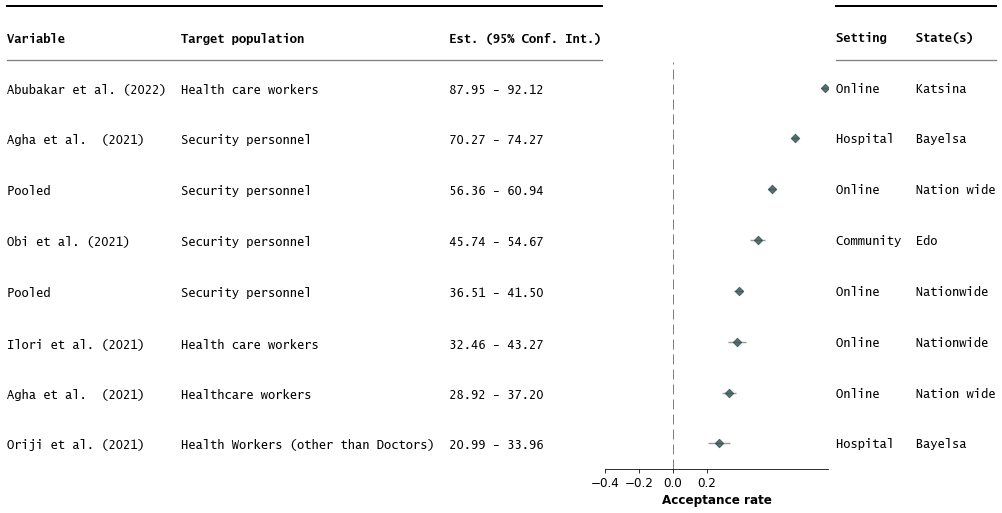

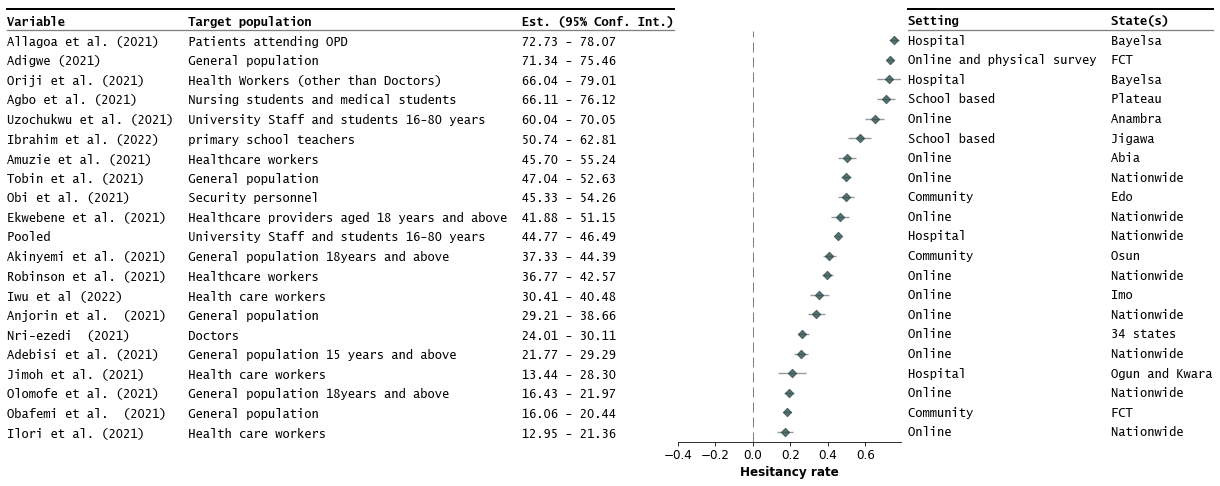

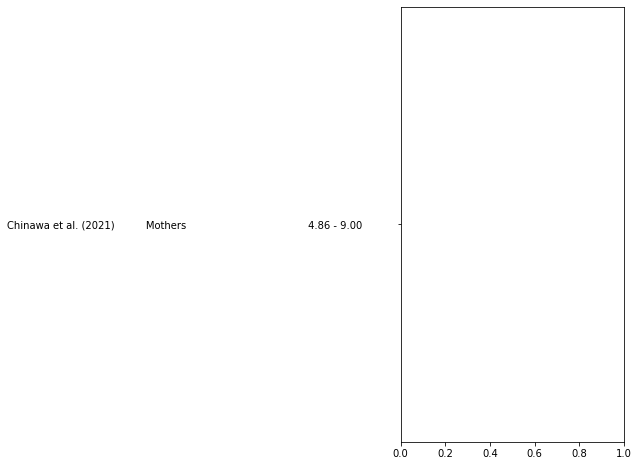

In [7]:
fp.forestplot(acceptance,  # the dataframe with results data
              estimate="Acceptance rate (%)",  # col containing estimated effect size 
              ll="lower_limit", hl="upper_limit",  # lower & higher limits of conf. int.
              varlabel="Study",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              #pval="p-val",  # column containing p-values to be formatted
              annote=["Target population","95% Confidence interval"],  # columns to report on left of plot
              annoteheaders=["Target population", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["Setting", "State(s)"],  # columns to report on right of plot 
              right_annoteheaders=["Setting", "State(s)"],  # ^corresponding headers
              #groupvar="group",  # column containing group labels
              #group_order=["labor factors", "occupation", "age", "health factors", 
              #            "family factors", "area of residence", "other factors"],                   
              xlabel="Acceptance rate",  # x-label title
              xticks=[-.4,-.2,0, .2],  # x-ticks to be printed
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )

fp.forestplot(hesitancy,  # the dataframe with results data
              estimate="Hesitancy rate (%)",  # col containing estimated effect size 
              ll="lower_limit", hl="upper_limit",  # lower & higher limits of conf. int.
              varlabel="Study",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              #pval="p-val",  # column containing p-values to be formatted
              annote=["Target population","95% Confidence interval"],  # columns to report on left of plot
              annoteheaders=["Target population", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["Setting", "State(s)"],  # columns to report on right of plot 
              right_annoteheaders=["Setting", "State(s)"],  # ^corresponding headers
              #groupvar="group",  # column containing group labels
              #group_order=["labor factors", "occupation", "age", "health factors", 
              #            "family factors", "area of residence", "other factors"],                   
              xlabel="Hesitancy rate",  # x-label title
              xticks=[-.4,-.2,0, .2, .4, .6],  # x-ticks to be printed
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )

fp.forestplot(intention,  # the dataframe with results data
              estimate="Vaccine intention rate (%)",  # col containing estimated effect size 
              ll="lower_limit", hl="upper_limit",  # lower & higher limits of conf. int.
              varlabel="Study",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              #pval="p-val",  # column containing p-values to be formatted
              annote=["Target population","95% Confidence interval"],  # columns to report on left of plot
              annoteheaders=["Target population", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["Setting", "State(s)"],  # columns to report on right of plot 
              right_annoteheaders=["Setting", "State(s)"],  # ^corresponding headers
              #groupvar="group",  # column containing group labels
              #group_order=["labor factors", "occupation", "age", "health factors", 
              #            "family factors", "area of residence", "other factors"],                   
              xlabel="Vaccine intention rate",  # x-label title
              xticks=[-4,-.2,0, .2, .4, .6],  # x-ticks to be printed
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )

In [ ]:
# fp.forestplot(acceptance_corr,  # the dataframe with results data
#               estimate="r",  # col containing estimated effect size 
#               ll="ll", hl="hl",  # lower & higher limits of conf. int.
#               varlabel="var",  # column containing the varlabels to be printed on far left
#               capitalize="capitalize",  # Capitalize labels
#               pval="p-val",  # column containing p-values to be formatted
#               annote=["n", "power", "est_ci"],  # columns to report on left of plot
#               annoteheaders=["N", "Power", "Est. (95% Conf. Int.)"],  # ^corresponding headers
#               rightannote=["formatted_pval"],  # columns to report on right of plot 
#               right_annoteheaders=["P-value"],  # ^corresponding headers                
#               xlabel="Pearson correlation coefficient",  # x-label title
#               xticks=[-.4,-.2,0, .2],  # x-ticks to be printed
#               sort=True,  # sort estimates in ascending order
#               table=True,  # Format as a table
#               # Additional kwargs for customizations
#               **{"marker": "D",  # set maker symbol as diamond
#                  "markersize": 35,  # adjust marker size
#                  "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
#                  "xlinecolor": "#808080",  # gray color for x-reference line
#                  "xtick_size": 12,  # adjust x-ticker fontsize
#                 }  
#              )

Making a funnel plot

In [ ]:
sample_sizes = acceptance['Sample size']
effect_sizes = acceptance['Acceptance rate (%)']

# Calculate the standard error for each data point
standard_errors = 1 / np.sqrt(sample_sizes)

# Create a funnel plot
plt.figure(figsize=(8, 6))
plt.scatter(effect_sizes, np.log(standard_errors), color='blue', marker='o', label='Studies')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Effect')
plt.xlabel('Effect Size')
plt.ylabel('Log(Standard Error)')
plt.title('Funnel Plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sample_sizes = np.array([10, 20, 30, 40, 50])
effect_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
standard_errors = 1 / np.sqrt(sample_sizes)

# Calculate the z-scores for each effect size
z_scores = effect_sizes / standard_errors

# Set the contour levels (e.g., 1.96 for 95% confidence)
contour_levels = np.array([1.96])

# Create a funnel plot
plt.figure(figsize=(8, 6))
plt.scatter(effect_sizes, np.log(standard_errors), color='blue', marker='o', label='Studies')

# Create contour lines
for level in contour_levels:
    lower_bound = -level / 2
    upper_bound = level / 2
    plt.axhline(lower_bound, color='red', linestyle='--', label=f'{level}% CI')
    plt.axhline(upper_bound, color='red', linestyle='--')

plt.axvline(x=0, color='red', linestyle='--', label='Zero Effect')
plt.xlabel('Effect Size')
plt.ylabel('Log(Standard Error)')
plt.title('Contour-Enhanced Funnel Plot')
plt.legend()
plt.grid(True)
plt.show()

Performing Bias test:
Begg's Test: Perform Begg's test, another statistical test for publication bias, using the scipy library:

In [ ]:
correlation, p_value = stats.kendalltau(effect_sizes, standard_errors)

if p_value < 0.05:
    print("Begg's test suggests publication bias.")
else:
    print("No evidence of publication bias according to Begg's test.")